### Questions


## Hypothesis Testing -> Frequentist Approach
    * Answer a question by looking at n-events or an event for n-days/minutes. 
    * Example: Which medicine is better, A B or C
        * A - Placebo
        * B - Medicine 1
        * C - Medicine 2
        * run the experiments, conclude that Medicine 1 is better, then administer that to people. 
    
    * Pros/Cons
        * (con) you might have outliers
        * You might be able to pull causality out of this (pro)
            * Causal Inference
        * (pro) repeatable
        * (con) you administered something not as good to people for some time. 
        

## Bayesian Approach
    * Multi-Arm Bandit Approach
    * tune your MAB model to be greedy or exploratory. 
        * greedy means if it sees a positive effect from a treatment: A, then it will give A to more people and stop giving the lesser treatment. 
        * exploratory means, it can randomly decide to try a treatment that has a lesser effect to see if that's really the case. 

### Objectives
YWBAT
* apply hypothesis testing to groups
* meeting test critera


### What is it? 
- Hypothesis testing is a methodology for measuring the differences between groups of people. 

* Experimental Design
    * Length of time or some other duration
    * Control Groups and Experimental Groups
    * Record data

### Scenarios
* Medical Research
    * Control Group, Test Group A, Test Group B, Test Group C
        * check if a drug has an effect on some statistic of the indidvuals in the groups. 
* Comparing battery types or designs
* Compare webpages
* Compare algorithms
* Compare ads

### Outline

In [11]:
import pandas as pd
import numpy as np

import scipy.stats as scs
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
iris = load_iris()
data = iris.data
target = iris.target
features = iris.feature_names

In [8]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Scenario
* The intern just finished measuring the sepal length, width and petal length/width of 150 plants. You want to know, is there a difference in these measurements between groups? 

In [10]:
df = pd.DataFrame(data, columns=features)
df['target'] = target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### let's examine the sepal length of each group

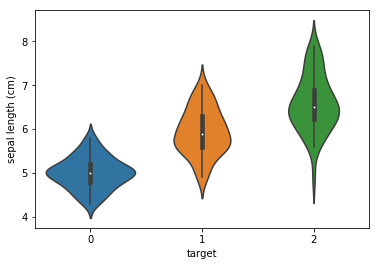

In [14]:
sns.violinplot(x='target', y='sepal length (cm)', data=df)

### What do we notice about the distributions by type?
* group 0, has a median of 5 and most are shorter than the rest
* group 2, has a larger range, has a higher median, has outliers
* group 1, kind of in the middle

In [24]:
sep_len_g0 = df.loc[df.target==0, 'sepal length (cm)']
sep_len_g1 = df.loc[df.target==1, 'sepal length (cm)']
sep_len_g2 = df.loc[df.target==2, 'sepal length (cm)']

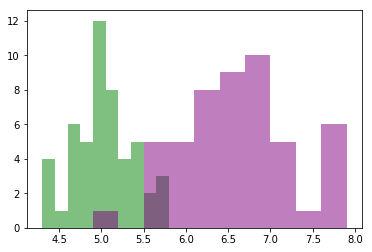

In [26]:
plt.hist(sep_len_g0, bins=10, color='g', alpha=0.5)
plt.hist(sep_len_g2, bins=10, color='purple', alpha=0.5)
plt.show()

### Error Types
- Type I Error: 
    - is the rejection of a true null hypothesis
    - You predict 1 but should have predicted 0 1-> True 0-> False
- Type II Error: 
    - failing to reject a false null hypothesis
    - You predict 0 but should have predicted 1. 
    
When do you want to minimize Type I Error? 
    * Approving someone for a home loan
    * Diagnosing Cancer

When do you want to minimize Type II Error?
    * Diagnosing a disease
    * Diagnosing Cancer

### Let's run a hypothesis test to test if there is a difference in the sepal length mean of the two groups


What type of ttest do we use? 
- independent ttest (2 sample ttest)
    - used to test 2 groups against one another


Step 1: Get your two groups separated
    
    
Step 2: Test assumptions
    - Normality of each group
    - Equal Variances

In [35]:
# let's test for normality

print(scs.shapiro(sep_len_g0))
# p = 0.45 -> sep_len_g0 is normal with a confidence of 95%

print(scs.shapiro(sep_len_g2))
# p = 0.46 -> sep_len_g1 is normal with a confidence of 95%


(0.9776989221572876, 0.4595281183719635)
(0.9711798429489136, 0.25832483172416687)


In [36]:
# let's test for equal variances
# H0: v1 = v2
# HA: v1 != v2
scs.levene(sep_len_g0, sep_len_g2)

# p = 0.001 -> reject the null hypothesis
# if variances are not equal, what do we do!!!!?

LeveneResult(statistic=11.454002162818494, pvalue=0.0010271363228426178)

In [37]:
# run the indepdent ttest with equal_var = False
# H0: mu1 = mu2
# HA: mu1 != mu2
t, p = scs.ttest_ind(sep_len_g0, sep_len_g2, equal_var=False)

print(p) 

# p ~ 0 -> reject the null hypothesis, 
# which means are means are different with 95% confidence

3.9668672709859296e-25


In [40]:
# What if these weren't normal groups? 

# Resampling methods to create a sampling distribution

sep_len_g0_means = []
sep_len_g2_means = []

# I'm going to use bootstrap sampling

for i in range(30):
    samp0 = np.random.choice(sep_len_g0, size=len(sep_len_g0), replace=True)
    samp2 = np.random.choice(sep_len_g2, size=len(sep_len_g2), replace=True)
    
    sep_len_g0_means.append(samp0.mean())
    sep_len_g2_means.append(samp2.mean())

In [42]:
scs.shapiro(sep_len_g0_means), scs.shapiro(sep_len_g2_means)

((0.9506867527961731, 0.17636987566947937),
 (0.9579759240150452, 0.2747340500354767))

### Assessment